# Clustering Algorithmen

In diesem Notebook wird kurz die Anwendung von k-means-Clustering und DBScan an einem Toy-Datensatz gezeigt.

### Daten erstellen

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

n_samples=2000
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

### Plotting

In [2]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Plot der Datenpunkte ohne Cluster-Zuordnung:

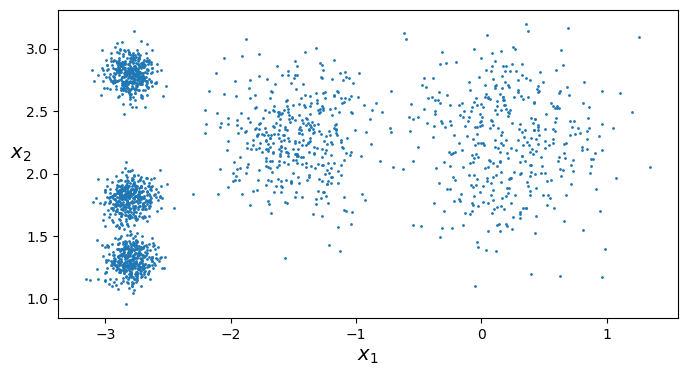

In [3]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

Plot der Datenpunkte mit zufälligem Assignment zu vier Clustern:

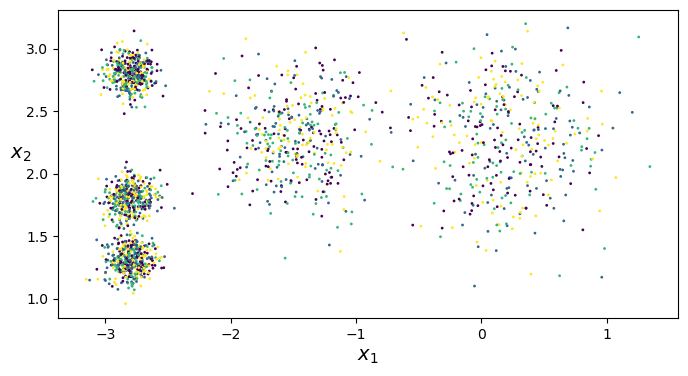

In [4]:
plt.figure(figsize=(8, 4))
plot_clusters(X, y=np.random.randint(4, size=n_samples))
plt.show()

### K-Means
Wir erstellen ein Clustering der Daten mit k-means für $k=3$ und berechnen den Silhouette-Score:

[0 0 1 ... 2 1 0]
Silhouette-Score for k=3 is 0.688531617595759


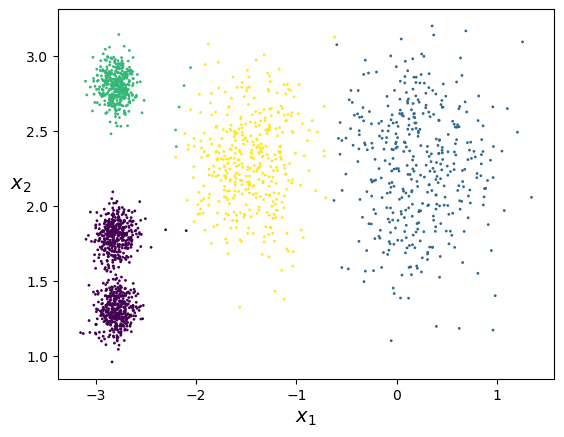

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)
s_score = silhouette_score(X, y_kmeans)
print(f"Silhouette-Score for k=3 is {s_score}")
plot_clusters(X, y_kmeans)

### DBSCAN Clustering

Nun clustern wir die Daten mit dem DBScan-Algorithmus:

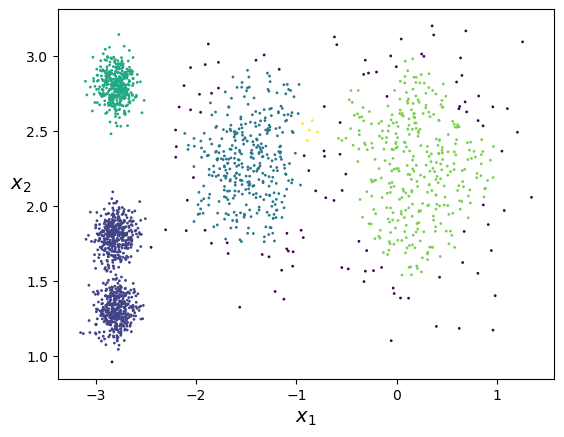

In [6]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X)
plot_clusters(X, dbscan.labels_)